# Aplicações práticas

# 2.17 Exercício 17: SCA_Prémio_Nobel_Países_Anos

## A. Enunciado 

Pretende-se conhecer a relação entre 420 Prémios Nobel (1. Fisiologia ou Medicina, 2. Ciências Económicas, 3. Física, 4. Literatura, 5. Paz, 6. Química) e os 8 países da Europa que, entre 1901 e 2020, receberam pelo menos 14 Prémios Nobel (1. Alemanha, 2. Itália, 3. Noruega, 4. Países Baixos, 5. Suécia, 6. Suíça, 7. Reino Unido, 8. França). Para facilitar a compreensão da relação entre as duas variáveis e criar o perfil dos Prémios Nobel por países segundo os anos (Ano 1. 1901-1999, Ano 2. 2000-2020) em que foram atribuídos, aplica-se a Análise de Correspondência Simples (SCA).
As variáveis ativas (País_Europa, Prémio_Nobel) constam da Tabela 1, que é do tipo (8 × 5), e as variáveis suplementares (Ano 1 e Ano 2) constam da Tabela 2, que é do tipo (2 × 5). Todas as variáveis são nominais. O número de 2 variáveis suplementares é inferior ao máximo permitido de 6 (8 categorias em coluna - 2), permitindo-se assim a exploração dos dados pela SCA.

Existem 3 células com zero: Países Baixos sem prémio de literatura, Suíça sem prémio em Ciências Económicas, e Ano 2: (2000-2020) sem prémio da paz entre os 8 países nestes 120 anos.
A SCA alerta para a existência de células sem resposta, com zeros ou com números negativos. No entanto, manteve-se a análise com os três zeros, porque a adição do valor 1 a todas as células não alteraria as associações em linha, em coluna, nem entre linhas e colunas. No entanto, conforme o leitor pode verificar (2.17.5.1.), os sinais positivos por dimensão poderiam ser alterados, fazendo com que os positivos numa dada dimensão passassem a negativos, ou vice-versa.

Note-se que as Tabelas 1 e 2 foram obtidas através do comando Crosstabs, porque a SCA dispersa a informação sobre as frequências das células em quadros separados, sendo as frequências absolutas apresentadas na Correspondence Table, cujos totais marginais são designados por Ative Margin, enquanto as frequências relativas aparecem no Row Profile e no Column Profiles, onde os totais marginais se designam por Mass.
Os dados constam das Tabelas 1 e 2, do ficheiro “cap02_exerc.17 Nobel Pais Ano SCA _adicionar 1.sav” e também estão organizados em um dicionário em Python.


# Resolução em Python

## Carregando Bibliotecas

In [1]:
import pandas as pd  # Fornece DataFrames e Series para manipulação de dados em Python, facilitando operações como leitura, escrita, e manipulação de estruturas de dados tabulares.

In [2]:
# Ajustar opções de visualização
pd.set_option('display.max_rows', 100)  # Mostra até 100 linhas
pd.set_option('display.max_columns', 20)  # Mostra até 20 colunas

## Funções Personalizadas

In [3]:
import sys

# Adicionar o caminho do diretório ao sys.path
sys.path.append(r"C:\Users\ricar\OneDrive\Área de Trabalho\Livro\Cap_02\socialdataanalysis")

from association import gerar_tabela_contingencia
from association import complementar_tabela_contingencia_com_analise_estatistica
from association import plot_stacked_bar_chart
from association import realizar_analise_correspondencia
from association import detalhar_resultados_analise_correspondencia
from association import analise_correspondencia_e_grafico

## Dados Fornecidos

In [4]:
# Dicionário com dados categorizados representando grupos e suas frequências
dados = {
    'Pais_Europa': [10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7,
                    6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
                    2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
    'Premio_Nobel': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
                     1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
                     1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
    'freq': [19, 6, 21, 9, 0, 16, 76, 17, 83, 50, 42, 81, 13, 3, 14, 16, 12, 12, 34, 10, 28, 14, 12, 32,
             7, 0, 7, 2, 3, 7, 5, 2, 4, 8, 5, 5, 3, 2, 10, 0, 1, 4, 2, 3, 1, 3, 2, 3, 6, 1, 5, 6, 1, 1,
             25, 2, 35, 10, 6, 33]
}

# Criando o DataFrame a partir do dicionário
dados = pd.DataFrame(dados)

# Convertendo as colunas para inteiros, se necessário
dados = dados.astype(int)

# Visualizando o dataframe
display(dados)

,Pais_Europa,Premio_Nobel,freq
0,10,1,19
1,10,2,6
2,10,3,21
3,10,4,9
4,10,5,0
5,10,6,16
6,9,1,76
7,9,2,17
8,9,3,83
9,9,4,50


## Tabela 1: Tabela de Contingência

In [5]:
# Obter automaticamente os nomes dos grupos e da coluna de frequência
grupos = dados.columns[:-1].tolist()  # Todos exceto a última coluna
categorias = {
    grupos[0]: ['1. Alemanha', '2. Itália', '3. Noruega', '4. P. Baixos', '5. Suécia',
        '6. Suiça', '7. UK', '8. França', '9. Ano 1', '10. Ano 2'],
    grupos[1]: ['1. Medicina', '2. Ciências Econômicas', '3. Física', '4. Literatura', 
                '5. Paz', '6. Química'],
}

tabela_contingencia_total = gerar_tabela_contingencia(dados, grupos, categorias)

display(tabela_contingencia_total)

Premio_Nobel,1. Medicina,2. Ciências Econômicas,3. Física,4. Literatura,5. Paz,6. Química
Pais_Europa,,,,,,
1. Alemanha,25,2,35,10,6,33
2. Itália,6,1,5,6,1,1
3. Noruega,2,3,1,3,2,3
4. P. Baixos,3,2,10,0,1,4
5. Suécia,5,2,4,8,5,5
6. Suiça,7,0,7,2,3,7
7. UK,34,10,28,14,12,32
8. França,13,3,14,16,12,12
9. Ano 1,76,17,83,50,42,81


<font color="blue">    
    
### 2.17.1. Explore os dados comparando:
</font>

<font color="blue">    
    
#### 2.17.1.1. As frequências observadas com as esperadas.
</font>

In [6]:
tabela_contingencia_principal = tabela_contingencia_total[:-2]

tabela_contingencia_calculos = complementar_tabela_contingencia_com_analise_estatistica(tabela_contingencia_principal, incluir_residuos=False)
display(tabela_contingencia_calculos)

Premio_Nobel                       1. Medicina 2. Ciências Econômicas   
Pais_Europa                                                             
1. Alemanha  Count                        25.0                    2.0  \
             Expected Count               25.0                    6.2   
             % within Pais_Europa         22.5                    1.8   
             % within Premio_Nobel        26.3                    8.7   
             % of Total                    6.0                    0.5   
2. Itália    Count                         6.0                    1.0   
             Expected Count                4.5                    1.1   
             % within Pais_Europa         30.0                    5.0   
             % within Premio_Nobel         6.3                    4.3   
             % of Total                    1.4                    0.2   
3. Noruega   Count                         2.0                    3.0   
             Expected Count                3.2                    0.8   
             % within Pais_Europa         14.3                   21.4   
             % within Premio_Nobel         2.1                   13.0   
             % of Total                    0.5                    0.7   
4. P. Baixos Count                         3.0                    2.0   
             Expected Count                4.6                    1.1   
             % within Pais_Europa         15.0                   10.0   
             % within Premio_Nobel         3.2                    8.7   
             % of Total                    0.7                    0.5   
5. Suécia    Count                         5.0                    2.0   
             Expected Count                6.5                    1.6   
             % within Pais_Europa         17.2                    6.9   
             % within Premio_Nobel         5.3                    8.7   
             % of Total                    1.2                    0.5   
6. Suiça     Count                         7.0                    0.0   
             Expected Count                6.0                    1.5   
             % within Pais_Europa         26.9                    0.0   
             % within Premio_Nobel         7.4                    0.0   
             % of Total                    1.7                    0.0   
7. UK        Count                        34.0                   10.0   
             Expected Count               29.3                    7.3   
             % within Pais_Europa         26.2                    7.7   
             % within Premio_Nobel        35.8                   43.5   
             % of Total                    8.1                    2.4   
8. França    Count                        13.0                    3.0   
             Expected Count               15.8                    3.9   
             % within Pais_Europa         18.6                    4.3   
             % within Premio_Nobel        13.7                   13.0   
             % of Total                    3.1                    0.7   
Total        Count                        95.0                   23.0   
             Expected Count               95.0                   23.5   
             % within Pais_Europa         22.6                    5.5   
             % within Premio_Nobel       100.0                  100.0   
             % of Total                   22.6                    5.5   

Premio_Nobel                       3. Física 4. Literatura 5. Paz 6. Química   
Pais_Europa                                                                    
1. Alemanha  Count                      35.0          10.0    6.0       33.0  \
             Expected Count             27.4          15.7   11.1       25.6   
             % within Pais_Europa       31.5           9.0    5.4       29.7   
             % within Premio_Nobel      33.7          16.9   14.3       34.0   
             % of Total                  8.3           2.4    1.4        7.9   
2. Itáli

In [7]:
tabela_contingencia_suple = tabela_contingencia_total[-2:]

tabela_contingencia_suple_calculos = complementar_tabela_contingencia_com_analise_estatistica(tabela_contingencia_suple, incluir_residuos=False)
display(tabela_contingencia_suple_calculos)

Premio_Nobel                      1. Medicina 2. Ciências Econômicas   
Pais_Europa                                                            
10. Ano 2   Count                        19.0                    6.0  \
            Expected Count               16.2                    3.9   
            % within Pais_Europa         26.8                    8.5   
            % within Premio_Nobel        20.0                   26.1   
            % of Total                    4.5                    1.4   
9. Ano 1    Count                        76.0                   17.0   
            Expected Count               78.8                   19.1   
            % within Pais_Europa         21.8                    4.9   
            % within Premio_Nobel        80.0                   73.9   
            % of Total                   18.1                    4.0   
Total       Count                        95.0                   23.0   
            Expected Count               95.0                   23.0   
            % within Pais_Europa         22.6                    5.5   
            % within Premio_Nobel       100.0                  100.0   
            % of Total                   22.6                    5.5   

Premio_Nobel                      3. Física 4. Literatura 5. Paz 6. Química   
Pais_Europa                                                                   
10. Ano 2   Count                      21.0           9.0    0.0       16.0  \
            Expected Count             17.7          10.0    7.2       16.5   
            % within Pais_Europa       29.6          12.7    0.0       22.5   
            % within Premio_Nobel      20.2          15.3    0.0       16.5   
            % of Total                  5.0           2.1    0.0        3.8   
9. Ano 1    Count                      83.0          50.0   42.0       81.0   
            Expected Count             86.3          49.0   35.3       80.5   
            % within Pais_Europa       23.8          14.3   12.0       23.2   
            % within Premio_Nobel      79.8          84.7  100.0       83.5   
            % of Total                 19.8          11.9   10.0       19.3   
Total       Count                     104.0          59.0   42.0       97.0   
            Expected Count            104.0          59.0   42.5       97.0   
            % within Pais_Europa       24.8          14.0   10.0       23.1   
            % within Premio_Nobel     100.0         100.0  100.0      100.0   
            % of Total                 24.8          14.0   10.0       23.1   

Premio_Nobel                       Total  
Pais_Europa                               
10. Ano 2   Count                   71.0  
            Expected Count          71.5  
            % within Pais_Europa   100.0  
            % within Premio_Nobel   16.9  
            % of Total              16.9  
9. Ano 1    Count                  349.0  
            Expected Count         349.0  
            % within Pais_Europa   100.0  
            % within Premio_Nobel   83.1  
            % of Total              83.1  
Total       Count                  420.0  
            Expected Count         420.5  
            % within Pais_Europa   100.0  
            % within Premio_Nobel  100.0  
            % of Total             100.0

<font color="blue">    
    
#### 2.17.1.2. As percentagens em linha de cada categoria com a média global.
</font>

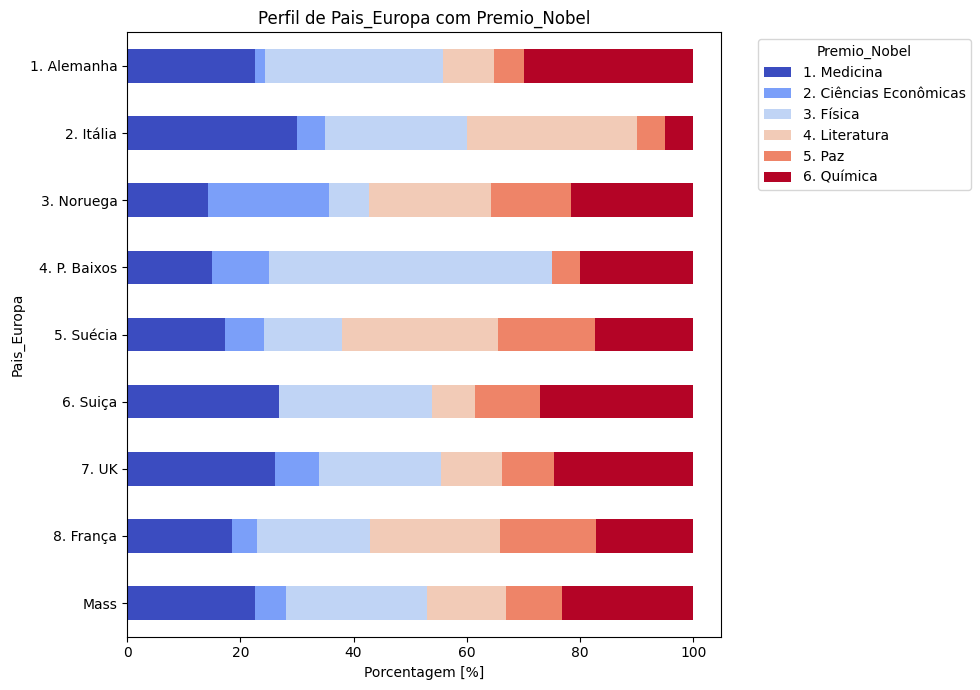

,1. Medicina,2. Ciências Econômicas,3. Física,4. Literatura,5. Paz,6. Química
1. Alemanha,0.225,0.018,0.315,0.090,0.054,0.297
2. Itália,0.300,0.050,0.250,0.300,0.050,0.050
3. Noruega,0.143,0.214,0.071,0.214,0.143,0.214
4. P. Baixos,0.150,0.100,0.500,0.000,0.050,0.200
5. Suécia,0.172,0.069,0.138,0.276,0.172,0.172
6. Suiça,0.269,0.000,0.269,0.077,0.115,0.269
7. UK,0.262,0.077,0.215,0.108,0.092,0.246
8. França,0.186,0.043,0.200,0.229,0.171,0.171
Mass,0.226,0.055,0.248,0.140,0.100,0.231


In [8]:
plot_stacked_bar_chart(tabela_contingencia_calculos, show_table=True)

<font color="blue">    
    
### 2.17.2. Determine a qualidade do modelo:
</font>


<font color="blue">    
    
#### 2.17.2.1. Variância explicada e número de dimensões
</font>

<font color="blue">    
    
#### 2.17.2.2. Teste do Qui-Quadrado
</font>

In [9]:
resultados_analise_correspondencia(tabela_contingencia_principal)

Dimension,Singular Value,Inertia,Chi Square,Sig.,Proportion of Inertia,Proportion of Inertia Cumulative
1,0.294,0.086,,,0.588,0.588
2,0.172,0.029,,,0.200,0.788
3,0.126,0.016,,,0.108,0.896
4,0.107,0.011,,,0.078,0.973
5,0.063,0.004,,,0.027,1.000
Total,,0.147,61.765,0.003,,


<font color="blue">    
    
#### 2.17.2.3. Desvios padrões e as correlações entre as dimensões
</font>

<font color="blue">    
    
### 2.17.3. Intensidade da associação das categorias por dimensão: definição das dimensões
</font>

In [10]:
detalhar_resultados_analise_correspondencia(tabela_contingencia_principal, n_components=3, focus='row', df_supplement=tabela_contingencia_suple)

,Mass,Score in Dimension 1,Score in Dimension 2,Score in Dimension 3,Inertia,Contribution of Point to Inertia of Dimension 1,Contribution of Point to Inertia of Dimension 2,Contribution of Point to Inertia of Dimension 3,Contribution of Dimension 1 to Inertia of Point,Contribution of Dimension 2 to Inertia of Point,Contribution of Dimension 3 to Inertia of Point,Total Contribution to Inertia
1. Alemanha,0.264,0.296,-0.089,-0.019,0.027,0.267,0.072,0.006,0.862,0.079,0.003,0.944
2. Itália,0.048,-0.319,-0.212,0.365,0.018,0.056,0.073,0.401,0.273,0.121,0.358,0.752
3. Noruega,0.033,-0.550,0.600,-0.025,0.023,0.116,0.407,0.001,0.445,0.529,0.001,0.975
4. P. Baixos,0.048,0.470,0.267,0.378,0.023,0.122,0.115,0.429,0.451,0.145,0.291,0.888
5. Suécia,0.069,-0.500,-0.063,-0.018,0.018,0.200,0.009,0.001,0.952,0.015,0.001,0.969
6. Suiça,0.062,0.205,-0.162,-0.143,0.006,0.030,0.055,0.080,0.411,0.256,0.199,0.866
7. UK,0.310,0.030,0.124,-0.065,0.009,0.003,0.161,0.082,0.032,0.549,0.149,0.730
8. França,0.167,-0.327,-0.138,0.003,0.023,0.206,0.107,0.000,0.759,0.135,0.000,0.893
9. Ano 1,0.831,-0.035,-0.026,-0.036,0.005,,,,0.214,0.122,0.230,0.566
10. Ano 2,0.169,0.170,0.128,0.176,0.023,,,,0.214,0.122,0.230,0.566


In [11]:
realizar_analise_correspondencia(tabela_contingencia_principal, n_components=3, focus='column')

,Mass,Score in Dimension 1,Score in Dimension 2,Score in Dimension 3,Inertia,Contribution of Point to Inertia of Dimension 1,Contribution of Point to Inertia of Dimension 2,Contribution of Point to Inertia of Dimension 3,Contribution of Dimension 1 to Inertia of Point,Contribution of Dimension 2 to Inertia of Point,Contribution of Dimension 3 to Inertia of Point,Total Contribution to Inertia
1. Medicina,0.226,0.054,-0.033,-0.037,0.008,0.007,0.008,0.019,0.084,0.032,0.040,0.156
2. Ciências Econômicas,0.055,-0.313,0.669,0.115,0.031,0.062,0.834,0.046,0.175,0.800,0.024,0.999
3. Física,0.248,0.281,-0.043,0.159,0.028,0.227,0.015,0.398,0.710,0.016,0.228,0.954
4. Literatura,0.140,-0.519,-0.165,0.086,0.044,0.437,0.129,0.065,0.865,0.087,0.024,0.975
5. Paz,0.100,-0.374,-0.034,-0.129,0.021,0.162,0.004,0.105,0.666,0.006,0.079,0.750
6. Química,0.231,0.198,0.034,-0.159,0.016,0.104,0.009,0.367,0.554,0.017,0.356,0.927


In [12]:
analise_correspondencia_e_grafico(tabela_contingencia_principal, x_component=0, y_component=1, tabela_contingencia_suple=tabela_contingencia_suple)

alt.LayerChart(...)

In [13]:
analise_correspondencia_e_grafico(tabela_contingencia_principal, x_component=0, y_component=2, tabela_contingencia_suple=tabela_contingencia_suple)

alt.LayerChart(...)